**Utilisation d'un arbre de décision pour la reconnaissance faciale.** 
Le dataset utilisé est 
"Labeled Faces in the Wild" http://vis-www.cs.umass.edu/lfw/
intégré dans le dataset de sklearn:
https://scikit-learn.org/stable/datasets/real_world.html#labeled-faces-in-the-wild-dataset

C'est un dataset benchmark utilisé pour la vérification d'identité. L'idée est de tenter de prédire l'identité (un numéro associé au nom) d'une personne à partir d'une image. Il contient plus de 13000 image (jpg) collectées du web. Chaque image est labelisée par le nom. 1680 personnes recensés  ont au moins 2 photographies. 
  




In [1]:
#importATION DES MODULES
from time import time
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.stats import loguniform

from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier

Importation des données

In [2]:
#Lors d'une connection avec une url pour charger les données d'un entrepot de données, il peut y avoir un problème de certification
#surtout quand vous êtes dans l'environnement mac os
#rajouter les instructions suivantes. Si ce n'est pas le cas, vous pouvez les mettre en commentaires..

import ssl 
try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context


In [3]:
#lecture des données
#considérez uniquement les observations ayant au minimum 70 images par personnes...
#pour une question de representativité et d'exactitude au niveau de la performance.

lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
#lfw_people = fetch_lfw_people() ##ca prendra du temps....essayez-le sur colab avec le GPU 

#introspectez les tableaux d'images pour trouver les dimensions (pour le traçage)
n_samples, h, w = lfw_people.images.shape
X = lfw_people.data
n_features = X.shape[1]
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]
print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)
print("les 4 premieres identités:") 

Total dataset size:
n_samples: 1288
n_features: 1850
n_classes: 7
les 4 premieres identités:


In [4]:
##séparation en jeu d'entrainement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
#fonction pour l'affichage de quelques images (une 20)
def plot_gallery(images, titles, h, w, n_row=4, n_col=5):
  #Helper function to plot a gallery of portraits
  plt.figure(figsize=(1.8 * n_col, 2.4 * n_row)) # plot figures.
  plt.subplots_adjust(bottom=0, left=0.01, right=0.99, top=0.90, hspace=0.35)
  
  for i in range(n_row * n_col):
    plt.subplot(n_row, n_col, i + 1)
    plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
    plt.title(titles[i], size=12)
    plt.xticks(())
    plt.yticks(())

In [6]:
def title(y_train, target_names, i):
  name = target_names[y_train[i]].rsplit(" ", 1)[-1]
  return "name: %s" % (name)

titles = [title(y_train, target_names, i) for i in range(y_train.shape[0])]

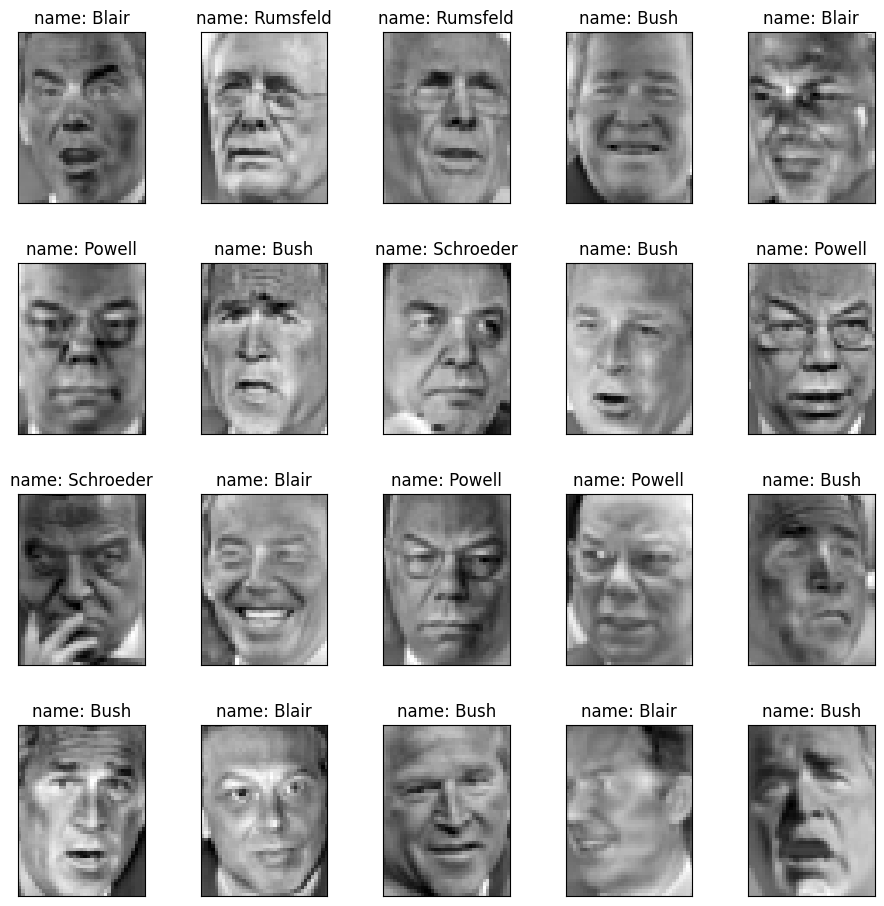

In [7]:
#affichage de quelques personnaes avec les noms associés
plot_gallery(X_train, titles, h, w)

In [9]:
#seléction de modele: DT
#Entrainement
clf = DecisionTreeClassifier(criterion="entropy")
clf.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy')

In [11]:
#tester avec le jeu de test
y_pred = clf.predict(X_test)

In [12]:
#mesure de la performance du modele appris sur l'échantillon de test
print(classification_report(y_test, y_pred, target_names=target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.10      0.18      0.13        11
     Colin Powell       0.48      0.45      0.46        47
  Donald Rumsfeld       0.29      0.32      0.30        22
    George W Bush       0.65      0.61      0.63       119
Gerhard Schroeder       0.22      0.21      0.22        19
      Hugo Chavez       0.57      0.31      0.40        13
       Tony Blair       0.32      0.41      0.36        27

         accuracy                           0.47       258
        macro avg       0.38      0.35      0.36       258
     weighted avg       0.49      0.47      0.48       258



In [13]:
#Une exactitude de 47% est vraiment faible, très proche d'un classeur Aléatoire....!!!

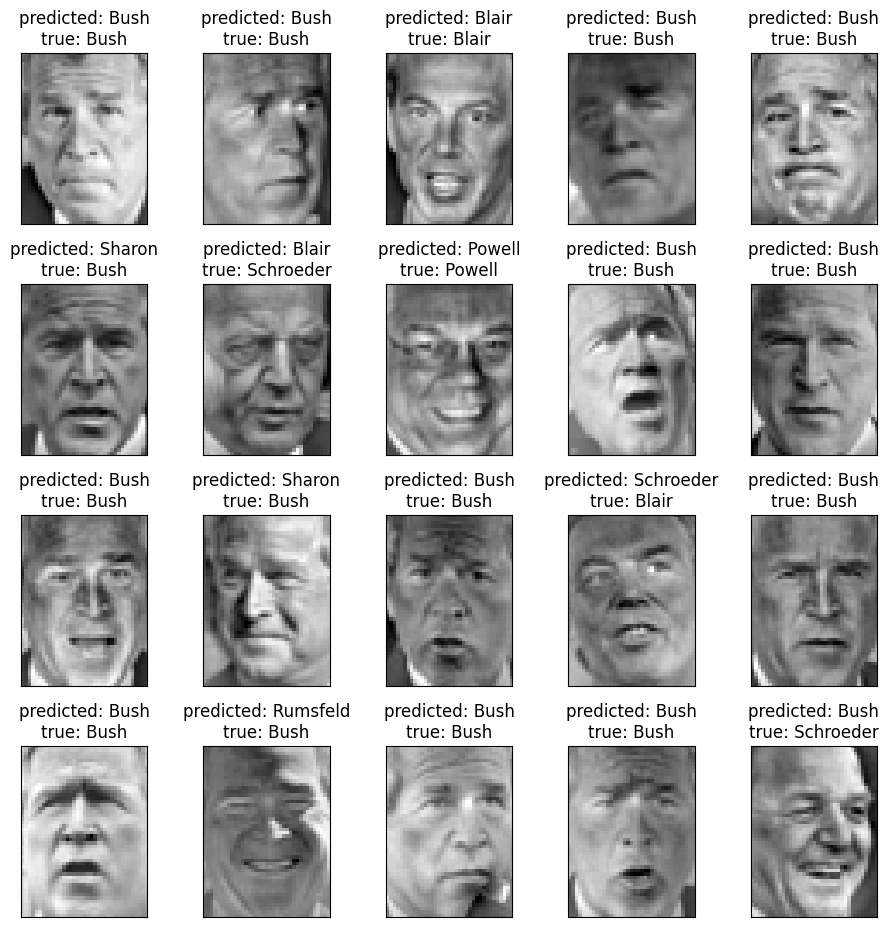

In [14]:

#affichage des prédictions

def pred_title(y_pred, y_test, target_names, i):
  pred_name = target_names[y_pred[i]].rsplit(" ", 1)[-1]
  true_name = target_names[y_test[i]].rsplit(" ", 1)[-1]
  return "predicted: %s\ntrue: %s" % (pred_name, true_name)


prediction_titles = [pred_title(y_pred, y_test, target_names, i) for i in range(y_pred.shape[0])]

plot_gallery(X_test, prediction_titles, h, w)

